In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from matplotlib.widgets import Slider, Button
import ipywidgets as widgets
from IPython.display import display

# 1. Time independent parameters

Here is the payoff matrix provided in the paper:



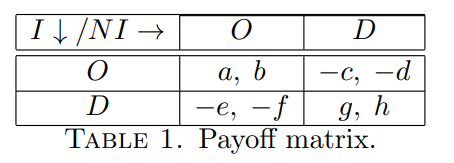

With the corresponding system of ODEs:

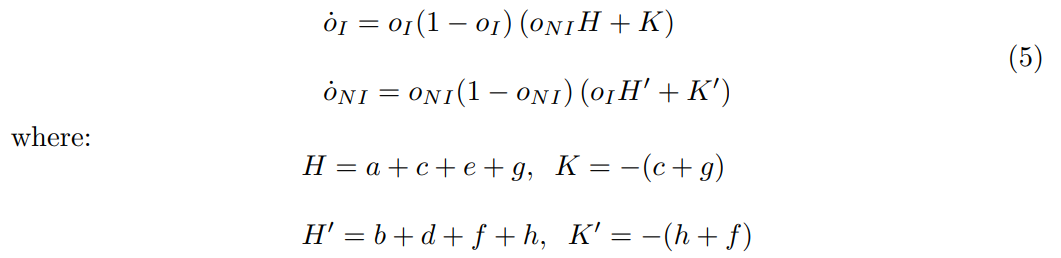


We start by plotting the vector field of the system of ODEs with all parameters equal to 1

In [2]:
# SETTING PAYOFF MATRIX VALS (P.16):
a=1
b=1
c=1
d=1
e=1
f=1
g=1
h=1

# SETTING CONSTANTS (P.19):
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f


In [3]:
# SETTING RATIOS:
nr_OI=10
nr_DI=10

nr_ONI=10
nr_DNI=10

nr_I = nr_OI + nr_DI
nr_NI = nr_ONI + nr_DNI

pop_tot = nr_I + nr_NI

# SETTING DISTRIBUTIONS (P.16):
o_i= nr_OI/ nr_I
d_i= nr_DI/ nr_I
o_ni= nr_ONI/nr_NI
d_ni= nr_DNI/nr_NI

# SETTING EXPECTATIONS (P.17):
exp_o_i = a*o_ni - c*(1-o_ni)
exp_d_i = -e*o_ni + g*(1-o_ni)
exp_o_ni = b*o_i - f*(1-o_i)
exp_d_ni = -d*o_i + h*(1-o_i)

In [4]:
# SETTING SYSTEM EQUATIONS (P.19):
def f_rumor(x,y):
    return (x*(1-x)*(y*H1 + K1), y*(1-y)*(x*H2 + K2))

Text(0.5, 1.0, 'Vector field for rumor spreading')

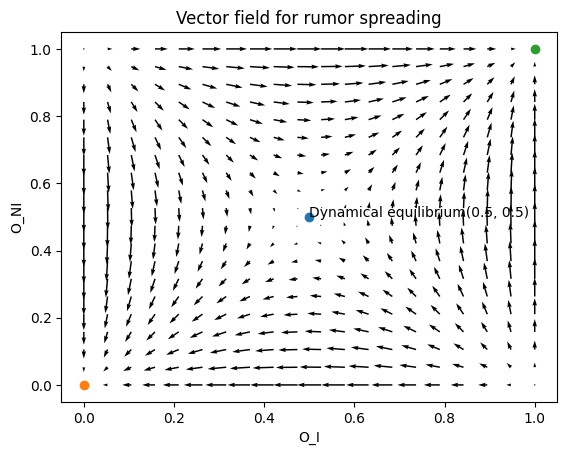

In [5]:
x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)

X, Y = np.meshgrid(x, y)
U, V = f_rumor(X,Y)

plt.quiver(X, Y, U, V)

plt.plot(-K2/H2,-K1/H1, 'o')
plt.plot(0,0, 'o')
plt.plot(1,1, 'o')
plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

plt.xlabel('O_I')
plt.ylabel('O_NI')
plt.title("Vector field for rumor spreading")

We consider the first integral 

$$
  C(x,y) :=(-K2-H2)\ln(1-X) + K2\ln(X) + (K1+H1)\ln(1-Y) - K1\ln(Y)
  $$
  
 which is locally constant on any solution of (5).

C:\Users\Manon\AppData\Local\Temp\ipykernel_7316\2801830305.py:16: RuntimeWarning: divide by zero encountered in log
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_7316\2801830305.py:16: RuntimeWarning: invalid value encountered in add
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
C:\Users\Manon\AppData\Local\Temp\ipykernel_7316\2801830305.py:16: RuntimeWarning: invalid value encountered in subtract
  C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)


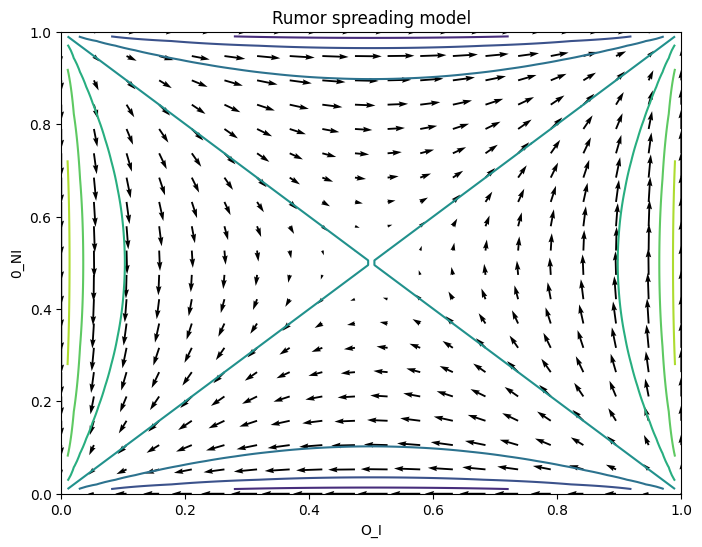

In [6]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x2=np.linspace(0, 1, 20)
y2=np.linspace(0, 1, 20)

X2, Y2 = np.meshgrid(x2, y2)
X, Y = np.meshgrid(x, y)
U, V = f_rumor(X2,Y2)



plt.figure(figsize = (8, 6))


plt.quiver(X2, Y2, U, V)
C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
plt.contour(X, Y, C)


plt.xlabel('O_I')
plt.ylabel('0_NI')
plt.title("Rumor spreading model")
plt.show()

## Testing different parameter values

In [32]:
#parameters

a=1
b=1
c=1
d=1
e=1
f=1
g=-8
h=8

H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f

C:\Users\Manon\AppData\Local\Temp\ipykernel_7316\1561721911.py:12: RuntimeWarning: divide by zero encountered in log
  C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
C:\Users\Manon\AppData\Local\Temp\ipykernel_7316\1561721911.py:12: RuntimeWarning: invalid value encountered in add
  C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)


Text(0.5, 1.0, 'Rumor spreading model')

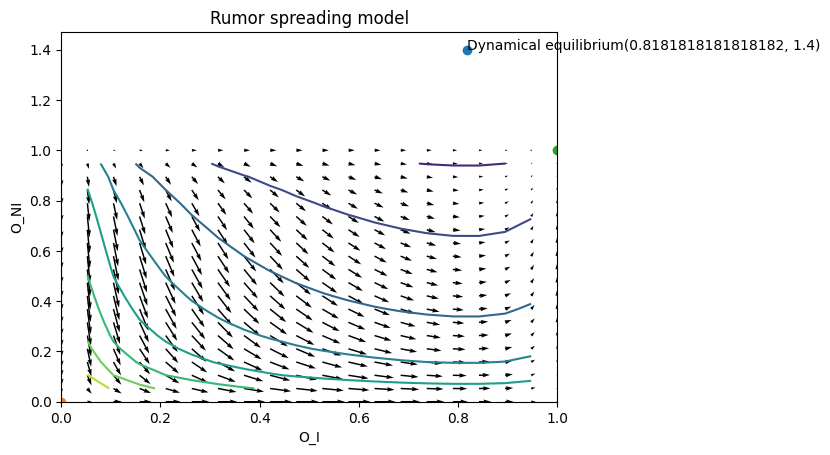

In [33]:
x_test = np.linspace(0, 1, 20)
y_test = np.linspace(0, 1, 20)
x_test2=np.linspace(0, 1, 20)
y_test2=np.linspace(0, 1, 20)

X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)


plt.quiver(X_test, Y_test, U_test, V_test)
C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
plt.contour(X_test, Y_test, C)

plt.plot(-K2/H2,-K1/H1, 'o')
plt.plot(0,0, 'o')
plt.plot(1,1, 'o')
plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

plt.xlabel('O_I')
plt.ylabel('O_NI')
plt.title("Rumor spreading model")




In [64]:
#Interactive vector field

def f_rumor_parameter(x,y,H1,K1,H2,K2):
    return (x*(1-x)*(y*H1 + K1), y*(1-y)*(x*H2 + K2))


def update_vector_field(a, b, c, d, e, f, g, h):
    plt.clf()

    dt = 0.001; max_time = 20

    H1 = a + c + e + g
    H2 = b + d + f + h
    K1 = -c - g
    K2 = -h - f


    x_test = np.linspace(0, 1, 20)
    y_test = np.linspace(0, 1, 20)
    x_test2=np.linspace(0, 1, 20)
    y_test2=np.linspace(0, 1, 20)

    X_test, Y_test = np.meshgrid(x_test, y_test)
    X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
    U_test, V_test = f_rumor_parameter(X_test,Y_test,H1,K1,H2,K2)


    plt.quiver(X_test, Y_test, U_test, V_test)
    C = (-K2-H2)*np.log(1-X_test) + K2*np.log(X_test) + (K1+H1)*np.log(1-Y_test) - K1*np.log(Y_test)
    plt.contour(X_test, Y_test, C)

    #plt.plot(-K2/H2,-K1/H1, 'o')
    #plt.plot(0,0, 'o')
    #plt.plot(1,1, 'o')
    #plt.text(-K2/H2,-K1/H1,'Dynamical equilibrium' +str((-K2/H2,-K1/H1)))

    plt.xlabel('O_I')
    plt.ylabel('O_NI')
    plt.title("Rumor spreading model")

    plt.show()


# Create sliders for the parameters
slider_a = widgets.FloatSlider(value=a, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a')
slider_b = widgets.FloatSlider(value=b, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b')
slider_c = widgets.FloatSlider(value=c, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c')
slider_d = widgets.FloatSlider(value=d, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d')
slider_e = widgets.FloatSlider(value=e, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e')
slider_f = widgets.FloatSlider(value=f, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f')
slider_g = widgets.FloatSlider(value=g, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g')
slider_h = widgets.FloatSlider(value=h, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h')


# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_vector_field, {
    'a': slider_a,
    'b': slider_b,
    'c': slider_c,
    'd': slider_d,
    'e': slider_e,
    'f': slider_f,
    'g': slider_g,
    'h': slider_h
})

# Display the sliders and the plot
display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
display(interactive_plot)

Output()

We can then plot the evolution of the proportions O_I and O_NI over the time.

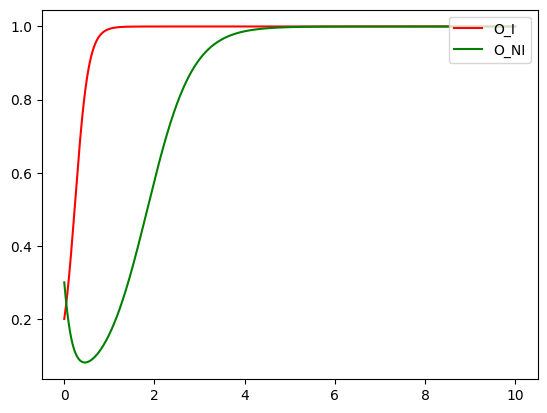

In [9]:
dt = 0.001; max_time = 10

# initial time and proportions
t = 0; x = 0.2 ; y = 0.3

# empty lists in which to store time and proportions
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + x*(1-x)*(y*H1 + K1)*dt
    y = y + y*(1-y)*(x*H2 + K2)*dt


    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results    
#p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)

plt.plot(t_list, x_list, "r", label="O_I")
plt.plot(t_list, y_list, 'g', label="O_NI")
plt.legend(loc="upper right")
plt.show()

In [63]:
#Interactive plot

x_init = 0.3
y_init = 0.2

def update_plot(a, b, c, d, e, f, g, h, x_init, y_init):
    plt.clf()

    dt = 0.001; max_time = 20

    H1 = a + c + e + g
    H2 = b + d + f + h
    K1 = -c - g
    K2 = -h - f

    t = 0
    x = x_init
    y = y_init

    t_list = [t]
    x_list = [x]
    y_list = [y]

    while t < max_time:
        t = t + dt
        x = x + x * (1 - x) * (y * H1 + K1) * dt
        y = y + y * (1 - y) * (x * H2 + K2) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    plt.plot(t_list, x_list, "r", label="O_I")
    plt.plot(t_list, y_list, 'g', label="O_NI")
    plt.legend(loc="upper right")
    plt.show()

# Create sliders for the parameters

slider_a = widgets.FloatSlider(value=a, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a')
slider_b = widgets.FloatSlider(value=b, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b')
slider_c = widgets.FloatSlider(value=c, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c')
slider_d = widgets.FloatSlider(value=d, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d')
slider_e = widgets.FloatSlider(value=e, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e')
slider_f = widgets.FloatSlider(value=f, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f')
slider_g = widgets.FloatSlider(value=g, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g')
slider_h = widgets.FloatSlider(value=h, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h')

slider_x_init = widgets.FloatSlider(value=x_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='x_init')
slider_y_init = widgets.FloatSlider(value=y_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='y_init')

# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_plot, {
    'a': slider_a,
    'b': slider_b,
    'c': slider_c,
    'd': slider_d,
    'e': slider_e,
    'f': slider_f,
    'g': slider_g,
    'h': slider_h,
    'x_init': slider_x_init ,
    'y_init': slider_y_init

})

# Display the sliders and the plot
display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
display(widgets.HBox([slider_x_init, slider_y_init]))
display(interactive_plot)

Output()

Remark:
Oscillatory bahavior when:

g=-8 (g<-1 ?) and h=8 and (a<-1.5 or e<-1.5) and other parameters =1


### How parameters affect the vector field?


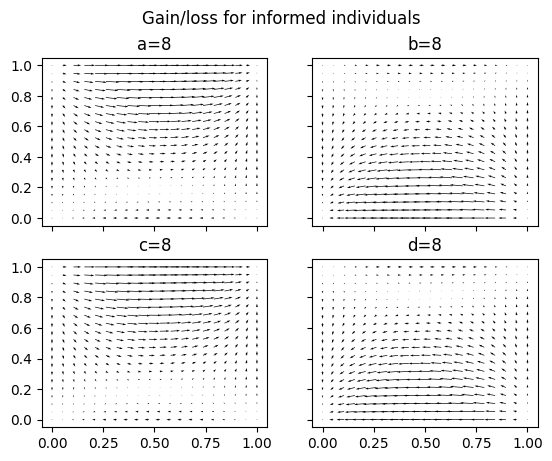

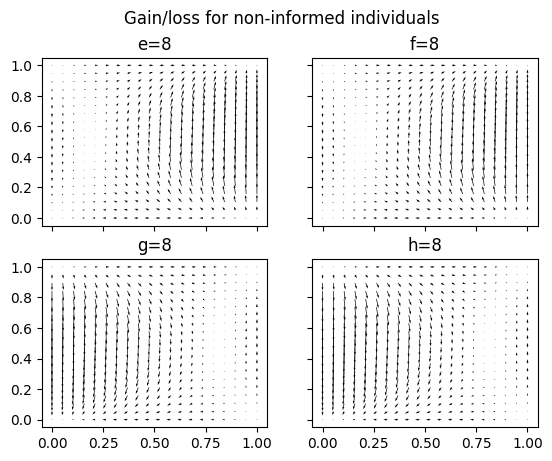

In [10]:
a=8
b=1
c=1
d=1
e=1
f=1
g=1
h=1

H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f




x_test = np.linspace(0, 1, 20)
y_test = np.linspace(0, 1, 20)
x_test2=np.linspace(0, 1, 20)
y_test2=np.linspace(0, 1, 20)

X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)


#plt.quiver(X_test, Y_test, U_test, V_test)
#C = (-K2-H2)*np.log(1-X) + K2*np.log(X) + (K1+H1)*np.log(1-Y) - K1*np.log(Y)
#plt.contour(X, Y, C)




fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Gain/loss for informed individuals')
ax1.quiver(X_test, Y_test, U_test, V_test)
ax1.set_title('a=8')

a=1
c=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax2.quiver(X_test, Y_test, U_test, V_test)
ax2.set_title('b=8')

c=1
e=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax3.quiver(X_test, Y_test, U_test, V_test)
ax3.set_title('c=8')


e=1
g=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax4.quiver(X_test, Y_test, U_test, V_test)
ax4.set_title('d=8')

for ax in fig.get_axes():
    ax.label_outer()
    

    


fig, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2)
fig.suptitle('Gain/loss for non-informed individuals')
g=1
b=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax5.quiver(X_test, Y_test, U_test, V_test)
ax5.set_title('e=8')

b=1
d=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax6.quiver(X_test, Y_test, U_test, V_test)
ax6.set_title('f=8')

d=1
f=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax7.quiver(X_test, Y_test, U_test, V_test)
ax7.set_title('g=8')


f=1
h=8
H1= a+c+e+g
H2= b+d+f+h
K1= -c-g
K2= -h-f
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test2, Y_test2 = np.meshgrid(x_test2, y_test2)
U_test, V_test = f_rumor(X_test,Y_test)
ax8.quiver(X_test, Y_test, U_test, V_test)
ax8.set_title('h=8')

for ax in fig.get_axes():
    ax.label_outer()
    
    


# 2. Time dependent simulations

First, let us try the case where the parameters are constant until a certain time point at which the model changes.


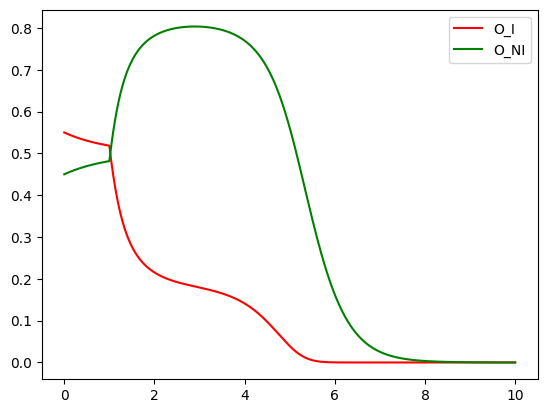

In [49]:
# model parameters

a_1=1
b_1=1
c_1=1
d_1=1
e_1=1
f_1=1
g_1=1
h_1=1

H1_1= a_1+c_1+e_1+g_1
H2_1= b_1+d_1+f_1+h_1
K1_1= -c_1-g_1
K2_1= -h_1-f_1

#new parameters after a certain time point

a_2=1
b_2=1
c_2=8
d_2=8
e_2=1
f_2=1
g_2=1
h_2=1

H1_2= a_2+c_2+e_2+g_2
H2_2= b_2+d_2+f_2+h_2
K1_2= -c_2-g_2
K2_2= -h_2-f_2


dt = 0.001; max_time = 10
time_point = 1

# initial time and proportions
t = 0; x = 0.55 ; y = 0.45

# empty lists in which to store time and proportions
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)




while t < time_point:
    # calc new values for t, x, y
    t = t + dt
    x = x + x*(1-x)*(y*H1_1 + K1_1)*dt
    y = y + y*(1-y)*(x*H2_1 + K2_1)*dt


    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)



while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + x*(1-x)*(y*H1_2 + K1_2)*dt
    y = y + y*(1-y)*(x*H2_2 + K2_2)*dt


    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results
plt.plot(t_list, x_list, "r", label="O_I")
plt.plot(t_list, y_list, 'g', label="O_NI")
plt.legend(loc="upper right")
plt.show()

In [60]:
#Interactive plot: we can play with the parameters before and after a certain time point

#initial values
x_init = 0.55
y_init = 0.45


def update_plot_time_point(a_1, b_1, c_1, d_1, e_1, f_1, g_1, h_1, a_2, b_2, c_2, d_2, e_2, f_2, g_2, h_2, x_init, y_init):
    plt.clf()

    H1_1 = a_1 + c_1 + e_1 + g_1
    H2_1 = b_1 + d_1 + f_1 + h_1
    K1_1 = -c_1 - g_1
    K2_1 = -h_1 - f_1

    H1_2 = a_2 + c_2 + e_2 + g_2
    H2_2 = b_2 + d_2 + f_2 + h_2
    K1_2 = -c_2 - g_2
    K2_2 = -h_2 - f_2

    # initial time and proportions
    t = 0
    x = x_init
    y = y_init

    dt = 0.001
    max_time = 10
    time_point = 1

    t_list = [t]
    x_list = [x]
    y_list = [y]

    while t < time_point:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_1 + K1_1) * dt
        y = y + y * (1 - y) * (x * H2_1 + K2_1) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    while t < max_time:
        t = t + dt
        x = x + x * (1 - x) * (y * H1_2 + K1_2) * dt
        y = y + y * (1 - y) * (x * H2_2 + K2_2) * dt

        t_list.append(t)
        x_list.append(x)
        y_list.append(y)

    plt.plot(t_list, x_list, "r", label="O_I")
    plt.plot(t_list, y_list, 'g', label="O_NI")
    plt.legend(loc="upper right")
    plt.show()

# Create sliders for the parameters
slider_a = widgets.FloatSlider(value=a_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a_1')
slider_b = widgets.FloatSlider(value=b_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b_1')
slider_c = widgets.FloatSlider(value=c_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c_1')
slider_d = widgets.FloatSlider(value=d_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d_1')
slider_e = widgets.FloatSlider(value=e_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e_1')
slider_f = widgets.FloatSlider(value=f_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f_1')
slider_g = widgets.FloatSlider(value=g_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g_1')
slider_h = widgets.FloatSlider(value=h_1, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h_1')

slider_a2 = widgets.FloatSlider(value=a_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='a_2')
slider_b2 = widgets.FloatSlider(value=b_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='b_2')
slider_c2 = widgets.FloatSlider(value=c_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='c_2')
slider_d2 = widgets.FloatSlider(value=d_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='d_2')
slider_e2 = widgets.FloatSlider(value=e_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='e_2')
slider_f2 = widgets.FloatSlider(value=f_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='f_2')
slider_g2 = widgets.FloatSlider(value=g_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='g_2')
slider_h2 = widgets.FloatSlider(value=h_2, min=-10, max=10, step=0.1, layout=widgets.Layout(width='25%'), description='h_2')

slider_x_init = widgets.FloatSlider(value=x_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='x_init')
slider_y_init = widgets.FloatSlider(value=y_init, min=0, max=1, step=0.05, layout=widgets.Layout(width='500px'), description='y_init')

# Create an interactive output for the plot
interactive_plot = widgets.interactive_output(update_plot_time_point, {
    'a_1': slider_a,
    'b_1': slider_b,
    'c_1': slider_c,
    'd_1': slider_d,
    'e_1': slider_e,
    'f_1': slider_f,
    'g_1': slider_g,
    'h_1': slider_h,

    'a_2': slider_a2,
    'b_2': slider_b2,
    'c_2': slider_c2,
    'd_2': slider_d2,
    'e_2': slider_e2,
    'f_2': slider_f2,
    'g_2': slider_g2,
    'h_2': slider_h2,

    'x_init': slider_x_init, 
    'y_init': slider_y_init
})

# Display the sliders and the plot
display(widgets.HBox([slider_a, slider_b, slider_c, slider_d]))
display(widgets.HBox([slider_e, slider_f, slider_g, slider_h]))
display(widgets.HBox([slider_a2, slider_b2, slider_c2, slider_d2]))
display(widgets.HBox([slider_e2, slider_f2, slider_g2, slider_h2]))
display(widgets.HBox([slider_x_init, slider_y_init]))
display(interactive_plot)

Output()

In [28]:
#Distributions - IDEAS FOR LATER
def normal(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * x**2))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))



#plt.plot(x, normal(x), linewidth=2, color='r')
#plt.show()